In [1]:
import torchaudio
import torch as tr
import librosa
import librosa.beat as beat
import numpy as np
import matplotlib.pyplot as plt
import nnAudio.Spectrogram
import seaborn as sns
import nnAudio
from sklearn.cluster import KMeans

In [2]:
signal, sr = librosa.load("resources/music/bj_new.mp3",sr=44100)

/home/physe/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [47]:
h_len = 600
tempo, beats = beat.beat_track(y=signal, sr=sr, hop_length=h_len)

In [48]:
librosa.frames_to_time(beats,sr=sr,hop_length=h_len)

array([2.58503401e-01, 7.75510204e-01, 1.29251701e+00, 1.82312925e+00,
       2.34013605e+00, 2.84353741e+00, 3.36054422e+00, 3.87755102e+00,
       4.39455782e+00, 4.91156463e+00, 5.41496599e+00, 5.93197279e+00,
       6.44897959e+00, 6.95238095e+00, 7.46938776e+00, 7.98639456e+00,
       8.50340136e+00, 9.00680272e+00, 9.52380952e+00, 1.00408163e+01,
       1.05578231e+01, 1.10612245e+01, 1.15782313e+01, 1.20816327e+01,
       1.25986395e+01, 1.31156463e+01, 1.36326531e+01, 1.41496599e+01,
       1.46666667e+01, 1.51700680e+01, 1.56870748e+01, 1.62040816e+01,
       1.67346939e+01, 1.72517007e+01, 1.77687075e+01, 1.82721088e+01,
       1.87891156e+01, 1.92925170e+01, 1.98095238e+01, 2.03265306e+01,
       2.08299320e+01, 2.13469388e+01, 2.18639456e+01, 2.23673469e+01,
       2.28979592e+01, 2.34013605e+01, 2.39047619e+01, 2.44217687e+01,
       2.49387755e+01, 2.54557823e+01, 2.59591837e+01, 2.64761905e+01,
       2.70068027e+01, 2.75102041e+01, 2.80272109e+01, 2.85442177e+01,
      

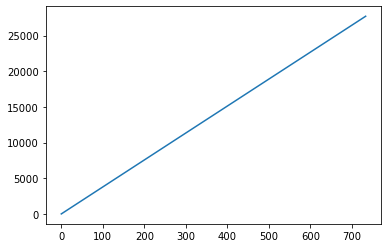

In [20]:
plt.plot(beats)

In [21]:
cqt = nnAudio.Spectrogram.CQT(sr=sr, n_bins=50,)

CQT kernels created, time used = 0.0425 seconds


In [22]:
cqt_signal = cqt(tr.tensor(signal, requires_grad=True))

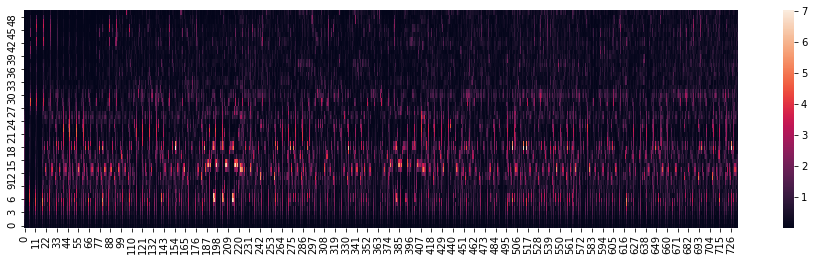

In [23]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(cqt_signal.squeeze().detach().numpy()[:,beats])
ax.invert_yaxis()

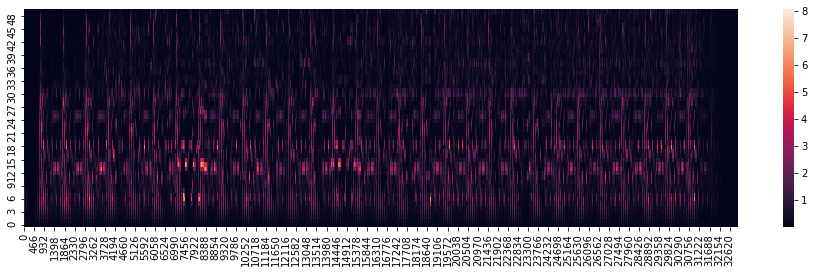

In [24]:
plt.figure(figsize=(16,4))
ax = sns.heatmap(cqt_signal.squeeze().detach().numpy())
ax.invert_yaxis()

In [10]:
cqt_signal.squeeze().detach().numpy()[:,beats]

array([[4.0444484e-01, 4.6099450e-02, 3.7153432e-01, ..., 2.0345038e-02,
        2.1066552e-02, 4.3105902e-03],
       [6.7332202e-01, 4.8369348e-02, 6.5482402e-01, ..., 1.7179690e-02,
        3.5499658e-02, 2.5154371e-03],
       [1.0307679e+00, 3.4127869e-02, 9.8512173e-01, ..., 8.0985744e-03,
        4.8781235e-02, 6.6360738e-03],
       ...,
       [3.7567988e-01, 3.0910749e+00, 4.6899781e-01, ..., 2.5727665e-02,
        9.6844453e-03, 1.1046263e-02],
       [2.6954916e-01, 1.8844568e+00, 3.3390173e-01, ..., 1.9419061e-02,
        1.3791799e-02, 1.8867809e-02],
       [1.9342735e-01, 2.9348677e-01, 4.6046281e-01, ..., 3.2623056e-02,
        1.3938507e-02, 1.5408634e-02]], dtype=float32)

In [11]:
beats_time = librosa.frames_to_time(beats, sr=sr)

In [12]:
(beats_time[-1] - beats_time[0])/ len(beats_time)

0.5131325263983886

In [26]:
beats

array([   19,    57,    95,   134,   172,   209,   247,   285,   323,
         361,   398,   436,   474,   511,   549,   587,   625,   662,
         700,   738,   776,   813,   851,   888,   926,   964,  1002,
        1040,  1078,  1115,  1153,  1191,  1230,  1268,  1306,  1343,
        1381,  1418,  1456,  1494,  1531,  1569,  1607,  1644,  1683,
        1720,  1757,  1795,  1833,  1871,  1908,  1946,  1985,  2022,
        2060,  2098,  2136,  2174,  2212,  2250,  2288,  2325,  2362,
        2400,  2438,  2477,  2515,  2553,  2590,  2628,  2666,  2704,
        2741,  2779,  2817,  2854,  2892,  2930,  2968,  3004,  3043,
        3081,  3118,  3156,  3194,  3232,  3269,  3308,  3345,  3382,
        3420,  3458,  3496,  3533,  3572,  3610,  3648,  3686,  3724,
        3762,  3799,  3836,  3873,  3911,  3949,  3987,  4025,  4063,
        4101,  4138,  4176,  4214,  4251,  4290,  4328,  4366,  4403,
        4441,  4478,  4516,  4553,  4592,  4629,  4667,  4705,  4743,
        4781,  4819,

[[6.96009696e-02 4.91329469e-02 1.53461853e-02 ... 2.44405851e-01
  1.14656679e-01 2.95750126e-02]
 [1.91330276e-02 1.07602458e-02 3.36910388e-03 ... 5.88364564e-02
  2.09443662e-02 6.06340617e-02]
 [5.24177507e-04 3.17424478e-04 4.98651410e-04 ... 1.44692585e-02
  5.53437881e-02 1.07333861e-01]
 ...
 [5.75498120e-08 1.54993263e-08 1.13611576e-09 ... 1.60080238e-09
  1.32395295e-08 1.42572617e-06]
 [4.82994338e-08 1.30023752e-08 1.10409282e-09 ... 1.20810684e-09
  1.25019133e-08 1.34853042e-06]
 [5.86716560e-08 1.54041455e-08 1.14303012e-09 ... 1.23543653e-09
  1.24868205e-08 1.31054765e-06]]


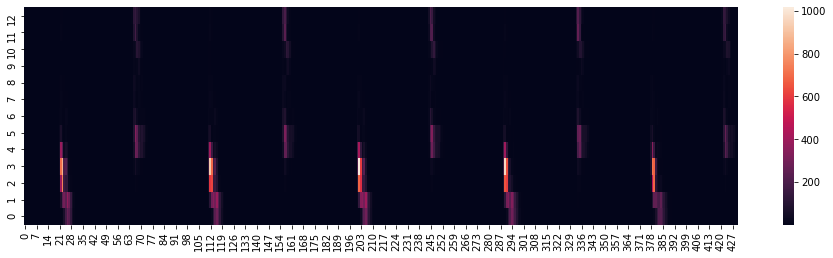

In [283]:
mel = librosa.feature.melspectrogram(signal[:44100*5], sr=sr, **{'n_mels':128})
print(mel)
plt.figure(figsize=(16,4))
ax = sns.heatmap(mel[:13,:])
ax.invert_yaxis()

In [284]:
cqt_librosa = librosa.core.constantq.cqt(signal,sr=sr,)

In [285]:
librosa.mel_frequencies(n_mels=128, fmin=0.0, fmax=44100.0, htk=False)

array([0.00000000e+00, 3.67844382e+01, 7.35688764e+01, 1.10353315e+02,
       1.47137753e+02, 1.83922191e+02, 2.20706629e+02, 2.57491067e+02,
       2.94275506e+02, 3.31059944e+02, 3.67844382e+02, 4.04628820e+02,
       4.41413259e+02, 4.78197697e+02, 5.14982135e+02, 5.51766573e+02,
       5.88551011e+02, 6.25335450e+02, 6.62119888e+02, 6.98904326e+02,
       7.35688764e+02, 7.72473202e+02, 8.09257641e+02, 8.46042079e+02,
       8.82826517e+02, 9.19610955e+02, 9.56395394e+02, 9.93179832e+02,
       1.03138386e+03, 1.07126092e+03, 1.11267978e+03, 1.15570003e+03,
       1.20038361e+03, 1.24679482e+03, 1.29500046e+03, 1.34506990e+03,
       1.39707521e+03, 1.45109123e+03, 1.50719571e+03, 1.56546939e+03,
       1.62599615e+03, 1.68886309e+03, 1.75416070e+03, 1.82198295e+03,
       1.89242746e+03, 1.96559561e+03, 2.04159270e+03, 2.12052812e+03,
       2.20251547e+03, 2.28767276e+03, 2.37612253e+03, 2.46799209e+03,
       2.56341367e+03, 2.66252459e+03, 2.76546751e+03, 2.87239057e+03,
      

In [286]:
tempo, beats = librosa.beat.beat_track(signal, sr=sr, hop_length=600)
mfccs = librosa.feature.mfcc(y=signal,sr=sr,**{'n_fft':1200, 'win_length':1200, 'hop_length':600})

In [287]:
beats.shape

(734,)

In [288]:
mfccs.shape

(20, 28180)

In [289]:
spec_cent = librosa.feature.spectral_centroid(signal, n_fft=1200, hop_length=600, win_length=1200)

In [306]:
##### spec_cent_beat = spec_cent[:,beats]
spec_cent_diff = spec_cent_beat[:,:-1] - spec_cent_beat[:,1:]
spec_cent_diff = np.concatenate((spec_cent_diff,[[0.0,0.0]]), axis=1)
kmean = KMeans(n_clusters=8)
kmean.fit(spec_cent_diff.reshape(-1,1))
sorted(kmean.cluster_centers_)

[array([-627.90353234]),
 array([-362.64814937]),
 array([-188.35645978]),
 array([-36.45229901]),
 array([89.89504226]),
 array([240.71198425]),
 array([400.8355401]),
 array([634.01300546])]

In [297]:
318/60*139

736.6999999999999

In [298]:
# There are 690 detected points, and if we consider the beginning and the end of the music, there will be no 
# more than 750 points. That means 750 pictures are enough. The program generates a picture for every 0.1 
# seconds (10 points a second), it approximately generates 3000 pictures in total. Hence, we need to select 
# 750 points over 3000 points as well as compute the difference between the two adjacent spectral centroid 
# points. Then, we need to strengthen the visual difference between two pictures to make people feel that the
# picture is rapidly changing.

In [299]:
ones_matrix = np.ones((64,64,3))

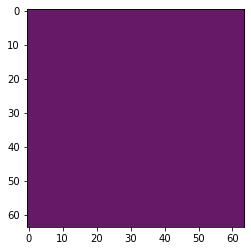

In [300]:
plt_matrix = np.copy(ones_matrix)
plt_matrix[:,:,0] = ones_matrix[:,:,0]*0.4
plt_matrix[:,:,1] = ones_matrix[:,:,1]*0.1
plt_matrix[:,:,2] = ones_matrix[:,:,2]*0.4
plt_matrix=plt_matrix.astype(np.float32)
plt.imshow(plt_matrix)

In [301]:
def change_colour(matrix, colour_vec):
    res = np.copy(matrix)
    res[:,:,0] = matrix[:,:,0]*colour_vec[0]
    res[:,:,1] = matrix[:,:,1]*colour_vec[1]
    res[:,:,2] = matrix[:,:,2]*colour_vec[2]
    return res
init_colour = np.random.rand(200,3)

In [302]:
colours_features = np.zeros((130*60,3))# 20 pictures per second, 1 key picture for 3 seconds
for i in range(130):
    colours_features[i*60, :] = init_colour[i,:]
    

In [303]:
beat_points = (librosa.frames_to_time(beats, sr=44100, hop_length=600)/0.05).astype(np.int32)
spec_cent_beat

array([[1380.91384767, 1308.59782945, 1660.63346722, 1580.525449  ,
        1559.13610334, 1358.19665833, 1719.4680893 , 1453.96362075,
        1806.3732089 , 1766.37026426, 1955.00828011, 1664.96273153,
        1609.04498113, 1589.5388993 , 1790.03745877, 1676.93020153,
        1618.98853007, 1439.74704141, 1839.88836635, 1720.14099504,
        1709.8979721 , 1474.85447077, 1668.09834553, 1450.19672234,
        1760.55375054, 1553.45906241, 1658.49420863, 1641.21282183,
        1738.31637943, 1696.03011837, 2067.78782659, 1986.10186561,
        1682.13854241, 1802.63668584, 1692.29836062, 1786.67199936,
        2123.84879455, 1513.76016283, 1577.86415876, 1745.80421007,
        1973.61305749, 1594.46993653, 1647.2574395 , 1635.63587958,
        1614.76224838, 1614.86665564, 2099.4322523 , 1731.28384024,
        1668.6969094 , 1649.64918973, 2106.99102577, 1658.05438567,
        1621.78619707, 1556.65679434, 1805.08984993, 1656.44289358,
        1944.50016327, 1846.19995678, 1884.79217

In [312]:
for i in range(129):
    diff_vec = (init_colour[i] - init_colour[i+1])/60
    for j in range(60):
        colours_features[i*60+j] = init_colour[i]-j*diff_vec

ones_matrix = np.ones((64,64,3))

for _,beat_idx in enumerate(beat_points):
    if spec_cent_diff[:,_]>400:
        colours_features[beat_idx-2:beat_idx+3] =  colours_features[beat_idx-2:beat_idx+3]+np.hamming(5).reshape(-1,1)*np.array(colours_features[beat_idx-2:beat_idx+3])*0.4

for idx in range(130*60):
    item = colours_features[idx]
    item = np.clip(item, a_min=0, a_max=1)
    pic = change_colour(ones_matrix, item)
    plt.imsave('resources/imgs/bj/img%d.jpg'%idx, pic)

In [313]:
beat_points

array([   5,   15,   25,   36,   46,   56,   67,   77,   87,   98,  108,
        118,  128,  139,  149,  159,  170,  180,  190,  200,  211,  221,
        231,  241,  251,  262,  272,  282,  293,  303,  313,  324,  334,
        345,  355,  365,  375,  385,  396,  406,  416,  426,  437,  447,
        457,  468,  478,  488,  498,  509,  519,  529,  540,  550,  560,
        570,  581,  591,  601,  612,  622,  632,  642,  653,  663,  674,
        684,  694,  704,  715,  725,  735,  745,  756,  766,  776,  786,
        797,  807,  817,  828,  838,  848,  858,  869,  879,  889,  900,
        910,  920,  930,  940,  951,  961,  971,  982,  992, 1002, 1013,
       1023, 1033, 1043, 1053, 1064, 1074, 1084, 1095, 1105, 1115, 1125,
       1136, 1146, 1156, 1167, 1177, 1188, 1198, 1208, 1218, 1228, 1238,
       1249, 1259, 1269, 1280, 1290, 1300, 1311, 1321, 1331, 1342, 1352,
       1362, 1372, 1382, 1393, 1403, 1413, 1423, 1434, 1444, 1454, 1465,
       1475, 1485, 1495, 1506, 1516, 1526, 1536, 15

In [262]:
np.hamming(5)

array([0.08, 0.54, 1.  , 0.54, 0.08])

In [264]:
colours_features[beat_idx-2:beat_idx+3]+np.hamming(5).reshape(-1,1)*np.array(colours_features[beat_idx-2:beat_idx+3])*0.4

array([[0.65937519, 0.11815862, 0.2688418 ],
       [0.9248872 , 0.16186902, 0.36227974],
       [1.2384572 , 0.21167251, 0.46566517],
       [0.94373746, 0.15750938, 0.34033108],
       [0.68652955, 0.11187843, 0.2372241 ]])

In [310]:
beat_points[np.where(spec_cent_diff>100)[1]]

array([  46,   67,  108,  149,  170,  190,  211,  231,  251,  324,  345,
        375,  416,  478,  519,  560,  601,  642,  663,  684,  704,  745,
        817,  828,  858,  879,  910,  940, 1033, 1084, 1105, 1125, 1146,
       1167, 1188, 1259, 1280, 1300, 1352, 1362, 1382, 1403, 1444, 1516,
       1557, 1609, 1629, 1640, 1650, 1722, 1763, 1783, 1804, 1856, 1876,
       1887, 1908, 1938, 1949, 1959, 1979, 2020, 2040, 2061, 2071, 2091,
       2143, 2174, 2205, 2215, 2246, 2266, 2277, 2318, 2339, 2359, 2380,
       2400, 2431, 2462, 2482, 2524, 2544, 2565, 2575, 2606, 2626, 2647,
       2667, 2678, 2708, 2740, 2760, 2781, 2812, 2832, 2853, 2873, 2904,
       2935, 2976, 3007, 3027, 3038, 3058, 3079, 3099, 3120, 3151, 3171,
       3253, 3264, 3284, 3335, 3356, 3366, 3408, 3449, 3469, 3511, 3531,
       3562, 3593, 3623, 3643, 3654, 3705, 3746, 3757, 3777, 3818, 3839,
       3962, 4003, 4034, 4065, 4096, 4116, 4147, 4168, 4188, 4208, 4229,
       4250, 4281, 4301, 4311, 4353, 4373, 4394, 44

In [248]:
beat_points.shape

(690,)

In [249]:
beat_points

array([  66,   75,   84,   93,  101,  110,  119,  128,  136,  145,  154,
        164,  173,  182,  191,  200,  209,  218,  228,  237,  246,  255,
        264,  273,  282,  291,  300,  309,  318,  328,  336,  345,  354,
        363,  372,  381,  390,  399,  408,  417,  425,  435,  444,  453,
        462,  471,  479,  488,  497,  506,  515,  524,  533,  541,  550,
        559,  568,  577,  586,  595,  605,  613,  622,  632,  640,  649,
        659,  668,  676,  685,  694,  703,  711,  721,  729,  738,  748,
        757,  765,  774,  783,  792,  801,  810,  819,  828,  837,  846,
        855,  864,  873,  882,  892,  900,  909,  918,  927,  936,  946,
        955,  964,  973,  981,  990,  999, 1007, 1017, 1026, 1035, 1044,
       1053, 1061, 1070, 1079, 1088, 1097, 1106, 1115, 1123, 1133, 1142,
       1151, 1160, 1169, 1178, 1187, 1196, 1204, 1213, 1223, 1232, 1241,
       1249, 1258, 1267, 1276, 1285, 1293, 1303, 1312, 1321, 1330, 1339,
       1348, 1357, 1365, 1375, 1385, 1394, 1404, 14